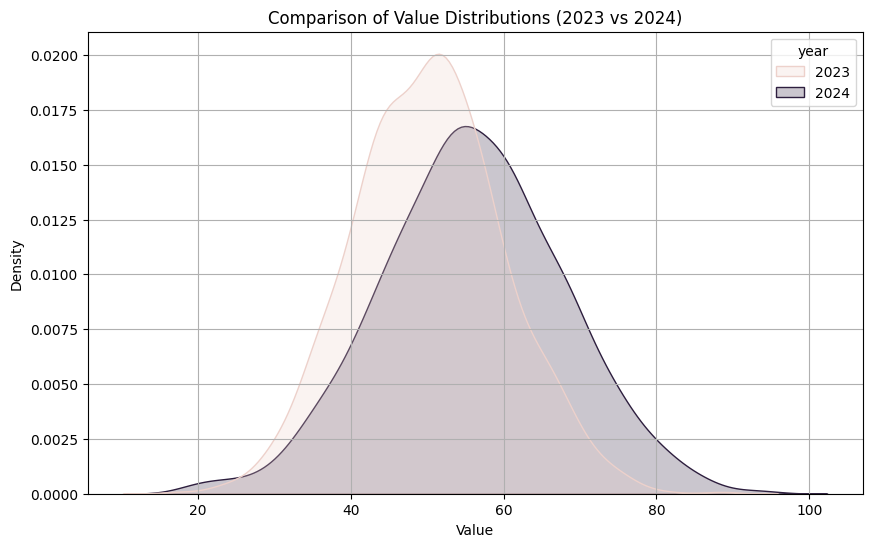


Descriptive Stats:

       count       mean        std        min        25%        50%  \
year                                                                  
2023  1000.0  50.193321   9.792159  17.587327  43.524097  50.253006   
2024  1000.0  55.850035  11.969453  19.715336  47.725100  55.756926   

            75%        max  
year                        
2023  56.479439  88.527315  
2024  63.746586  93.317291  

Kolmogorov-Smirnov Test:
Statistic = 0.2310
P-value   = 0.0000
→ Significant data drift detected (p < 0.05).


In [1]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Simulate data for two time periods
np.random.seed(42)
data_2023 = np.random.normal(loc=50, scale=10, size=1000)  # Baseline distribution
data_2024 = np.random.normal(loc=55, scale=12, size=1000)  # Drifted distribution

# Create DataFrames
df_2023 = pd.DataFrame({'year': 2023, 'value': data_2023})
df_2024 = pd.DataFrame({'year': 2024, 'value': data_2024})

# Combine
df = pd.concat([df_2023, df_2024])

# Plot Distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='value', hue='year', fill=True)
plt.title('Comparison of Value Distributions (2023 vs 2024)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Summary Statistics
print("\nDescriptive Stats:\n")
print(df.groupby('year')['value'].describe())

# KS Test for Data Drift Detection
statistic, p_value = ks_2samp(data_2023, data_2024)
print("\nKolmogorov-Smirnov Test:")
print(f"Statistic = {statistic:.4f}")
print(f"P-value   = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("→ Significant data drift detected (p < 0.05).")
else:
    print("→ No significant data drift detected (p >= 0.05).")

